In [1]:
from scipy.signal import lfilter, tf2zpk, zpk2tf, freqz, group_delay, freqs_zpk 
import matplotlib.pyplot as plt
import numpy as np
from math import e, pi, sin, cos
%matplotlib inline

In [2]:
def plot_response(w, h, title = 'Frequency response', f0 = None, log = False, lin = False) :
    fig = plt.figure ()
    ax1 = fig.add_subplot (111)
    if log :
        ax1.set_xscale ('log')
    plt.title (title)
    xlabel = 'Freq [rad/sample]'
    if f0 is not None :
        w = np.array (w) * f0 / (2 * pi)
        xlabel = 'Freq (Hz)'
        if f0 == 1.0 :
            xlabel = '$\\Omega$'
    if lin :
        plt.plot (w, abs (h), 'b')
        plt.ylabel ('Amplitude (lin.)', color = 'b')
    else :
        plt.plot (w, 20 * np.log10 (abs (h)), 'b')
        plt.ylabel ('Amplitude (dB)', color = 'b')
    plt.xlabel (xlabel)
    plt.grid (which = 'both')

    ax2 = ax1.twinx ()
    angles = np.unwrap (np.angle (h))
    plt.plot (w, angles, 'g')
    plt.ylabel ('Angle (rad)', color = 'g')
    plt.axis ('tight')
    plt.show ()

In [3]:
def plot_delay(w, d, title = "Group delay", f0 = None, log = False) :
    fig = plt.figure ()
    ax1 = fig.add_subplot (111)
    if log :
        ax1.set_xscale ('log')
    plt.title (title)
    xlabel = 'Freq [rad/sample]'
    if f0 is not None :
        w = np.array (w) * f0 / (2 * pi)
        xlabel = 'Freq (Hz)'
        if f0 == 1.0 :
            xlabel = '$\\Omega$'
    plt.plot (w, d, 'b')
    plt.ylabel ('Delay', color = 'b')
    plt.xlabel (xlabel)

    plt.grid ()
    plt.axis ('tight')
    plt.show ()

In [4]:
def pole_zero_plot (poles, zeros, limit = 1e6) :
    poles = np.array (poles)
    zeros = np.array (zeros)
    m1 = m2 = 1
    if len (poles) :
        m1 = max (abs (poles))
    if len (zeros) :
        m2 = max (abs (zeros))
    m  = max (m1, m2) + 1
    if m > limit :
        m = limit
    plt.plot(np.real(zeros), np.imag(zeros), 'ob')
    plt.plot(np.real(poles), np.imag(poles), 'xr')
    plt.legend(['Zeros', 'Poles'], loc=2)
    plt.title('Pole / Zero Plot')
    plt.ylabel('Real')
    plt.xlabel('Imag')
    plt.grid()
    plt.xlim (-m, m)
    plt.ylim (-m, m)
    plt.gca ().set_aspect ('equal', adjustable='box')
    plt.show()


In [5]:
def update_conjugate_complex (numbers) :
    """ Modify numbers in-place to add conjugate complex numbers"""
    n2 = [k.conjugate () for k in numbers if k.imag]
    numbers.extend (n2)

## First example ##

W.-S. Lu. Design of stable IIR digital filters with equiripple
passbands and peak-constrained least-squares stopbands.
IEEE Transactions on Circuits and Systems II: 85
Analog and Digital Signal Processing, 46(11):1421–1426,
November 1999.

Page 1423, plot page 1424

In [6]:
b0 = 0.015251585
zeros = [  1.40060806+0.52562938j
        ,  0.71218856+1.31038625j
        , -0.34154833+0.94477549j
        , -0.72080392+0.77084135j
        , -1.07931648+0.26358750j
        , -1.10339797+0.12036580j
        ]
poles = [ -0.55252815
        , -0.93489129+0.14881956j
        , -0.13041701+0.92361074j
        ,  0.10577534+0.70463643j
        ,  0.38840193+0.48449893j
        ,  0.56325419+0.17664608j
        ]
update_conjugate_complex (zeros)
update_conjugate_complex (poles)

In [7]:
(b, a) = zpk2tf (zeros, poles, b0)
w, h = freqz (b, a)
wgd, gd = group_delay ((b, a))

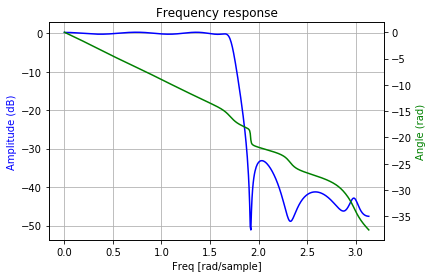

In [8]:
plot_response (w, h)

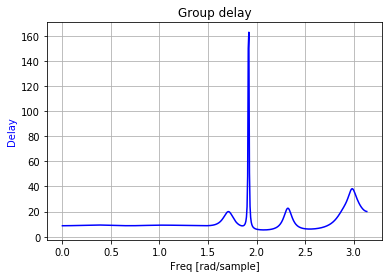

In [9]:
plot_delay (wgd, gd)

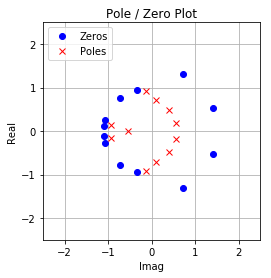

In [10]:
pole_zero_plot (poles, zeros)

## Second example ##

W.-S. Lu. Design of stable IIR digital filters with equiripple
passbands and peak-constrained least-squares stopbands.
IEEE Transactions on Circuits and Systems II: 85
Analog and Digital Signal Processing, 46(11):1421–1426,
November 1999.

Page 1425, plot on same page.


In [11]:
b0 = -0.00046047527
zeros = [ 18.63131093
        ,  1.49675301+0.48221524j
        ,  0.89762684+1.22910309j
        , -0.99895376+0.20015069j
        , -0.20222995+0.97998167j
        , -0.84535803+0.56243645j
        , -0.35458606+0.93926134j
        , -0.59858640+0.81318261j
        ]
poles = [  0.20628660
        ,  0.055677115+0.55763187j
        , -0.032471477+0.93555574j
        ,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0
        ]
update_conjugate_complex (zeros)
update_conjugate_complex (poles)

In [12]:
(b, a) = zpk2tf (zeros, poles, b0)
w, h = freqz (b, a)
wgd, gd = group_delay ((b, a))

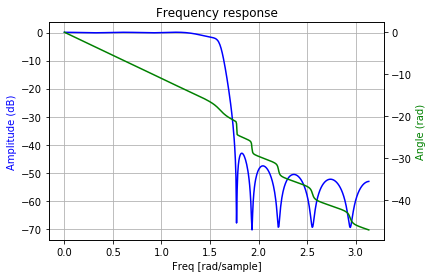

In [13]:
plot_response (w, h)

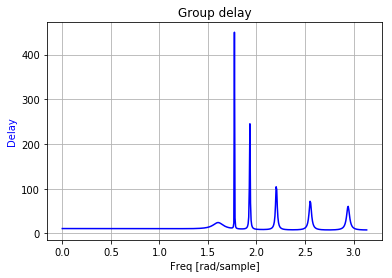

In [14]:
plot_delay (wgd, gd)

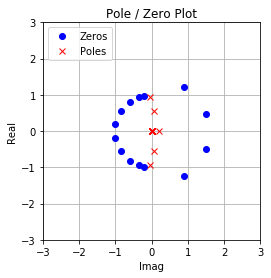

In [15]:
pole_zero_plot (poles, zeros, limit = 3)

## Third example ##
#### Taken from:

Rainer Storn. Differential evolution design of an IIR-filter with
requirements for magnitude and group delay. Technical Report
TR-95-026, International Computer Science Institute (ICSI), June
1995.

#### See also:

Rainer Storn. Differential evolution design of an IIR-filter. In
IEEE International Conference on Evolutionary Computation
(ICEC), pages 268–273, Nagoya, Japan, May 1996.

Reportedly this is a 7-degree FIR Pre-response-filter. But it only has 4 parameters. Hmm.

Note that the Frequency response is bogus, see the next graphics reconstructed from the frequency-response formula (13) from the technical report above. But we still don't know the design of the FIR-Pre-Filter.

-0.033271


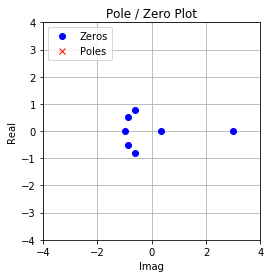

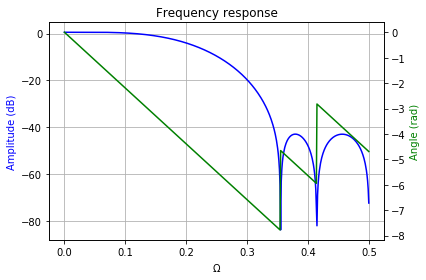

In [16]:
#fir = [-0.033271, -0.019816, 0.169865, 0.415454]
# Reverse-engineered FIR parameters, the commented list above is from the paper
# needed to find out that the parameters are re-used to make everything real.
# See accompanying maxima sheet.
fir = [-0.033271, -0.019816, 0.169865, 0.415454, 0.415454, 0.169865, -0.019816, -0.033271]

fir_zeros, fir_poles, fir_gain = tf2zpk (fir, [1.0])
print (fir_gain)
w, h = freqz (fir)
pole_zero_plot (fir_poles, fir_zeros)
plot_response (w, h, f0 = 1.0)

This is the frequency response of the Pre-Filter according to Storn technical report formula (1) (the part that belongs to the FIR filter)

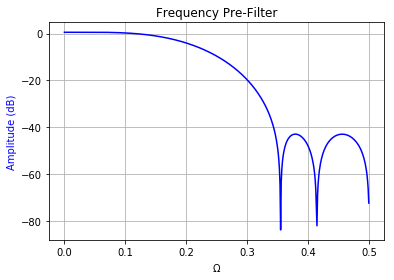

In [17]:
xa = []
ya = []
for i in  range (512) :
    phi = i / 512. * pi
    xa.append (phi / pi / 2.0)
    y = 0.0
    for k in range (4) :
        y += fir [k] * 2 * cos (phi * (k - 3.5))
    ya.append (abs (y))
fig = plt.figure ()
ax1 = fig.add_subplot (111)
plt.title ('Frequency Pre-Filter')
plt.plot (xa, 20 * np.log10 (ya), 'b')
plt.ylabel ('Amplitude (dB)', color = 'b')
plt.xlabel ('$\Omega$')

plt.grid ()
plt.axis ('tight')
plt.show ()

Parameters:
The first 5 are the radii of the zeros, the next five the angles of the zeros.
Then follow 4 radii of poles and 4 angles of poles.

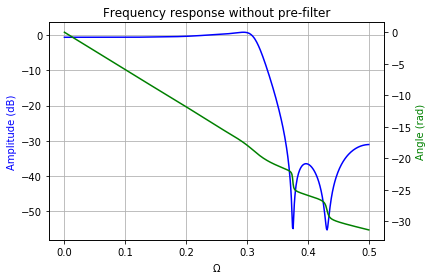

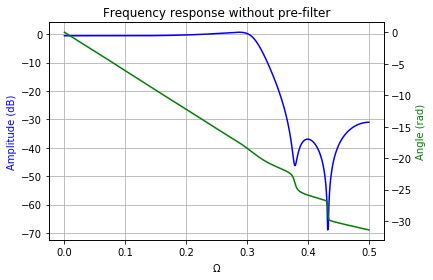

In [18]:
a0_1 = 0.00390625
params1 = \
 [ 1.620493889,  1.006124616,  1.016987443,  2.498671532,   1.919012547
 , 0.2243566662, 0.3745155931, 0.4304945767, 0.02474720217, 0.1109348238
 , 0.6369678974, 0.4702593982, 0.408888042,   0.8722907901
 , 0.2370584458, 0.125761658,  0.05192748457, 0.3109594584
 ]
a0_2 = 0.01
params2 = \
 [ 1.70534277,   1.019881606,  1.558364391,  1.001873851, 1.829733968
 , 0.1320674717, 0.3776784241, 0.2309984416, 0.4321155548, 0.04620760679
 , 0.8493334651, 0.3932341039,  0.6438843012, 0.5428563952
 , 0.3089904487, 0.01219726913, 0.2359268814, 0.124328509
 ]
zeros1 = [params1 [k]    * e ** (2j * pi * params1 [k+5])  for k in range (5)]
poles1 = [params1 [k+10] * e ** (2j * pi * params1 [k+14]) for k in range (4)]
zeros2 = [params2 [k]    * e ** (2j * pi * params2 [k+5])  for k in range (5)]
poles2 = [params2 [k+10] * e ** (2j * pi * params2 [k+14]) for k in range (4)]
# FIR-Pre-Filter: Multiply with other filter should convolve the first + second?
update_conjugate_complex (zeros1)
update_conjugate_complex (poles1)
update_conjugate_complex (zeros2)
update_conjugate_complex (poles2)
(b1, a1) = zpk2tf (zeros1, poles1, a0_1)
w1, h1 = freqz (b1, a1)
plot_response (w1, h1, title = 'Frequency response without pre-filter', f0 = 1.0)
(b2, a2) = zpk2tf (zeros2, poles2, a0_2)
w2, h2 = freqz (b2, a2)
plot_response (w2, h2, title = 'Frequency response without pre-filter', f0 = 1.0)

zeros1.extend (list (fir_zeros))
zeros2.extend (list (fir_zeros))
(b1, a1) = zpk2tf (zeros1, poles1, a0_1 * fir_gain)
w1, h1 = freqz (b1, a1)
wgd1, gd1 = group_delay ((b1, a1))
(b2, a2) = zpk2tf (zeros2, poles2, a0_2 * fir_gain)
w2, h2 = freqz (b2, a2)
wgd2, gd2 = group_delay ((b2, a2))

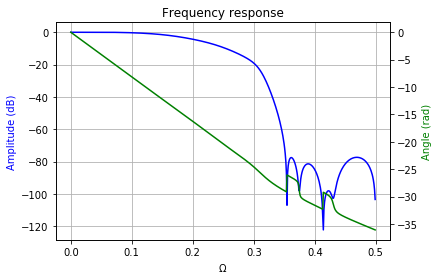

In [19]:
plot_response (w1, h1, f0 = 1.0)

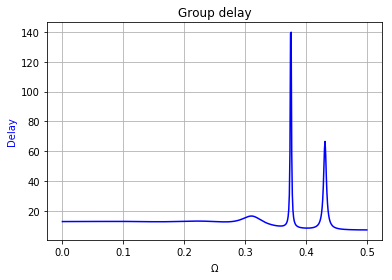

In [20]:
plot_delay (wgd1, gd1, f0 = 1.0)

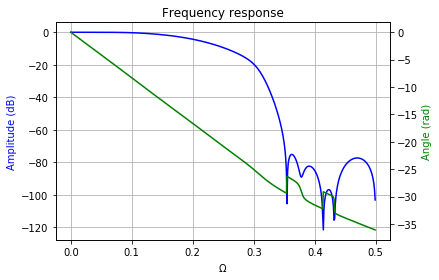

In [21]:
plot_response (w2, h2, f0 = 1.0)

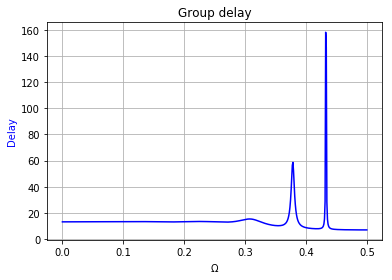

In [22]:
plot_delay (wgd2, gd2, f0 = 1.0)

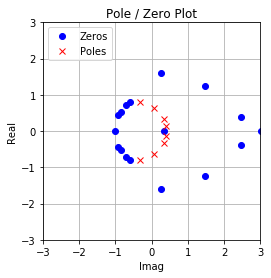

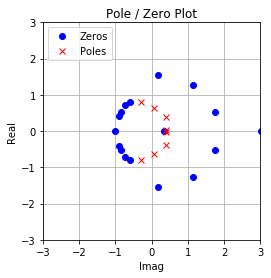

In [23]:
pole_zero_plot (poles1, zeros1, limit = 3)
pole_zero_plot (poles2, zeros2, limit = 3)

## Example 4: From DE Book ##
Kenneth V. Price, Rainer M. Storn, and Jouni A. Lampinen.
Differential Evolution: A Practical Approach to Global Optimization.
Springer, Berlin, Heidelberg, 2005.

Page 434 Table 7.12

(array([-1.1436981 +0.j        , -0.78186651+0.54873521j,
       -0.78186651-0.54873521j, -0.33471898+0.4283815j ,
       -0.33471898-0.4283815j ]), array([-0.29255553+0.83655009j, -0.29255553-0.83655009j,
        0.03949807+0.4715525j ,  0.03949807-0.4715525j ,
       -0.08275477+0.j        ]), 0.19881558418273926)


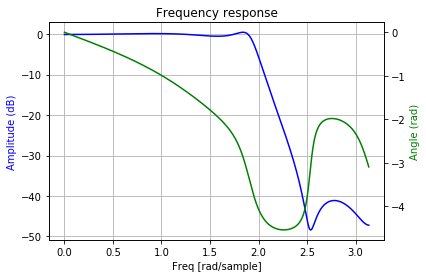

In [24]:
b = [ 0.19881558418273926
    , 0.6713742017745972 
    , 0.956078052520752  
    , 0.7260297536849976 
    , 0.29759085178375244
    , 0.0613178014755249 
    ]
a = [ 1.0
    , 0.5888696908950806
    , 1.0049885511398315
    , 0.14867675304412842
    , 0.18157732486724854
    , 0.014554023742675781
    ]
print (tf2zpk (b, a))
w, h = freqz (b, a)
wg, gd = group_delay ((b, a))
plot_response (w, h)

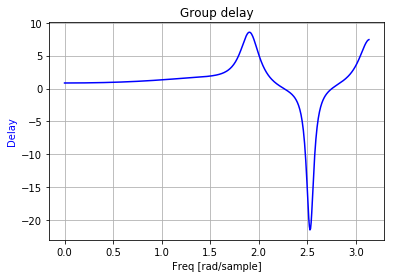

In [25]:
plot_delay (wg, gd)

## Moving Average filter ##
From
John G. Proakis and Dimitris G. Manolakis. Digital Signal
Processing: Principles, Algorithms, and Applications. Pearson,
Prentice Hall, Upper Saddle River, New Jersey, fourth edition, 2007.
p. 285

[-0.5+0.8660254j -0.5-0.8660254j] [] 0.3333333333333333
[1.0] [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


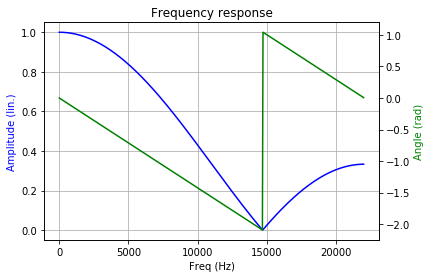

In [26]:
b = [1.0/3.0] * 3
a = [1.0]
z, p, g = tf2zpk (b, a)
print (z, p, g)
print (a, b)
w, h = freqz (b, a)
wg, gd = group_delay ((b, a))
plot_response (w, h, f0 = 44100, lin = True)
#plot_delay (wg, gd, f0 = 44100)
#pole_zero_plot (p, z)
xa = []
ya = []